In [1]:
from IPython.display import display, HTML
image_address = "https://s3.ap-southeast-1.amazonaws.com/images.deccanchronicle.com/dc-Cover-g4bflmnbi4coegebsi9036ohp2-20200810222739.Medi.jpeg" 
html = '<div style="text-align:center;"><img src="{}" style="width:50%;"></div>'.format(image_address)
display(HTML(html))

# Introduction
Commencing with one of the India’s largest e-commerce marketplace which has a customer base of over 100 million called as Flipkart, by acquiring 77% of stakes, Walmart is the parent organization of Flipkart. It was started in 2007 with the initial focus on online books sales then gradually grew the prominence of expanding varieties of products across the country and it offers 80 million products such as fashion products, home essentials, groceries, electronics and other lifestyle products, etc.
In this dataset we have information like ProductName, Price, Rate, Review and Summary. It contains total of 104 types of different products sold on Flipkart.

# Problem
As per this dataset, the problem which has come forward is the products sales need to be boosted and to gain more positive feedback from the customers.
Importing Necessary libraries
We will import librabries which are required for to clean, visualize, calculating, and analyze the dataset.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Uploading and Reading the csv file(Dataset)

In [3]:
# Reading the csv file with help of pandas module 
df = pd.read_csv("flipkart_product.csv", encoding='unicode_escape')
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


Checking the shape of the dataset

In [4]:
df.shape

(189874, 5)

Checking the data type of each column in the dataset

In [5]:
df.dtypes

ProductName    object
Price          object
Rate           object
Review         object
Summary        object
dtype: object

Using Descriptive Statistics

In [6]:
# Describing the instances in the datasets
df.describe()

,ProductName,Price,Rate,Review,Summary
count,189874,189873,189873,189870,189860
unique,812,561,9,1264,98343
top,MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (P...,"â¹1,299",5,Nan,Good
freq,9278,10005,108694,20862,14175


checking information about each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


Checking any null value in the dataset

In [8]:
df.isnull().sum()

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

Total missing values in the whole dataset

In [9]:
df.isnull().sum().sum()

20

Using Heatmap from the seaborn library to check missing value.

The Heatmap is not showing the white lines as the dataset contains around 18k rows with 5 columns and in that only 20 values are missing, so it is a bit difficult to see the white lines in the map.

White is for misisng value

Black is non-missing value

<Axes: >

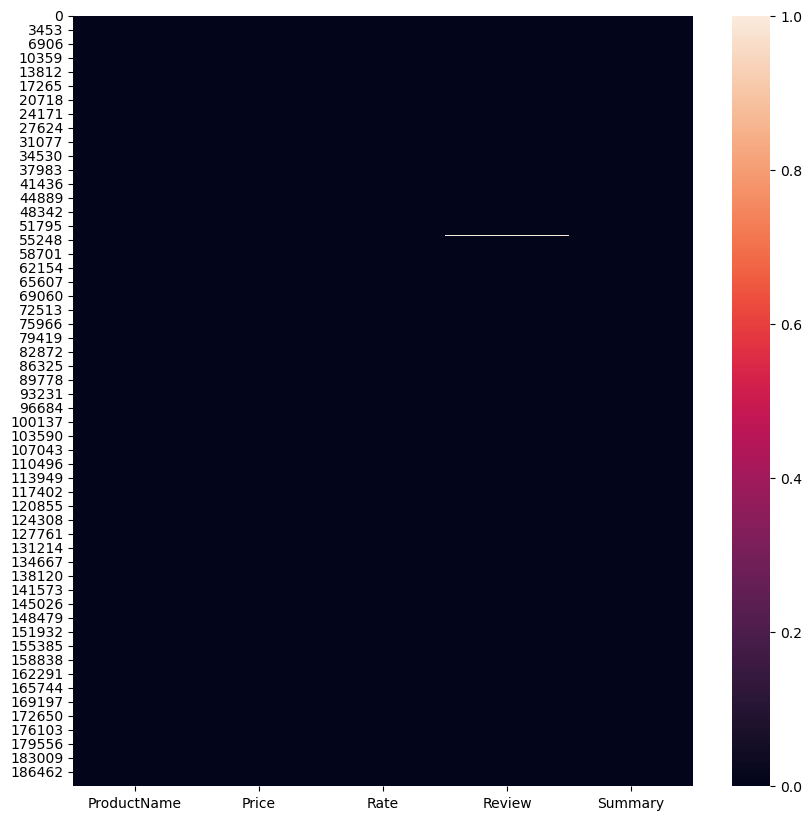

In [10]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isna())

Now we will check the missing values as percentage using the below code line, as I mentioned above the values which are missing are less that is why the percentage is also less as we can see the accuracy.

In [11]:
# This will generate the percentage of the missing values in the dataset
df.isnull().sum()/df.shape[0] * 100

ProductName    0.000000
Price          0.000527
Rate           0.000527
Review         0.002107
Summary        0.007373
dtype: float64

Using Bar graph to show the missing values in each column.


For a better understanding I have used bar chart to plot the missing values with the help of the below block of code. Firstly I have defined a variable name missing_counts which will keep the count of the missing values of each column, then with the help of matplotlib librabry we will define the size of the figure, x-axis(which will be the index of the missing_counts) and y- axis will be the height of the missing_counts i.e the max number of missing values in the dataset.Then in the rest of the we will define the title, x-axis and y-axis label and followed by a for loop which will take the missing_count values and will lable it above each bar, in the end we will plot the graph.

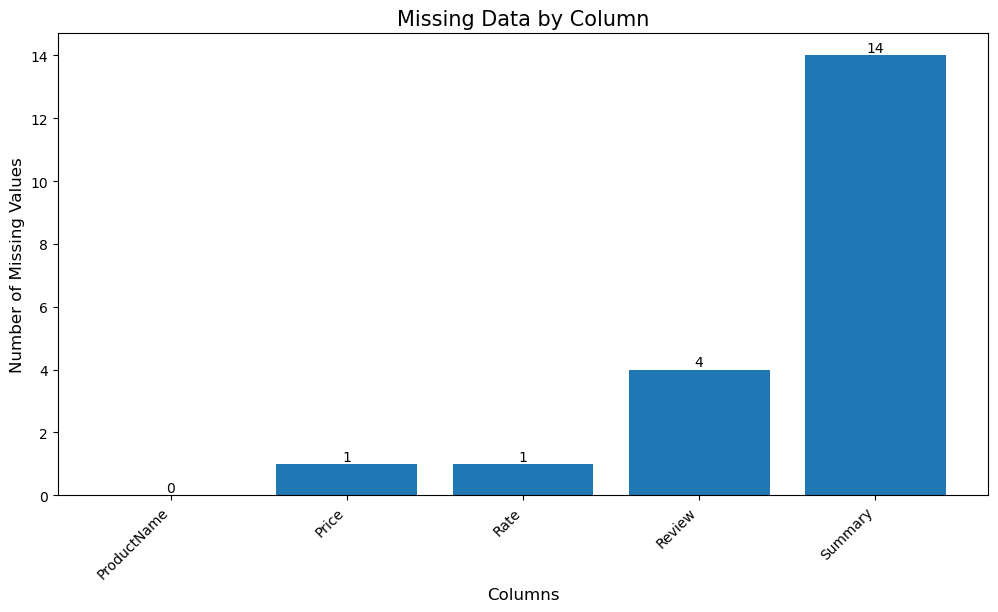

In [12]:
missing_counts = df.isnull().sum()
# create bar chart
plt.figure(figsize=(12,6))
plt.bar(x = missing_counts.index, height = missing_counts)

# set chart title and axis labels
plt.title('Missing Data by Column', fontsize=15)
plt.xlabel('Columns', fontsize = 12)
plt.ylabel('Number of Missing Values', fontsize=12)

# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# add value labels to bars
for i, v in enumerate(missing_counts.values):
    plt.text(i, v+.1, str(v), ha='center')

# display chart
plt.show()

Now with the help of the above bar chart we can easily see the missing values in each column. The Price and Rate column need to be converted as float or integer values.
In the below lines of code using the fillna function we will fill the nan values as 0 in both Price and Rate column.

In [13]:
df.fillna({'Price': 0,'Rate':0}, inplace = True) # Using fillna function of pandas library to fill missing values as 0
print(df)

                                              ProductName     Price Rate  \
0       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
1       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
2       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
3       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    1   
4       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
...                                                   ...       ...  ...   
189869  NIVEA Soft Light Moisturizer for Face, Hand & ...    â¹142    5   
189870  NIVEA Soft Light Moisturizer for Face, Hand & ...    â¹142    5   
189871  NIVEA Soft Light Moisturizer for Face, Hand & ...    â¹142    5   
189872  NIVEA Soft Light Moisturizer for Face, Hand & ...    â¹142    4   
189873                                                           0    0   

                 Review                                            Summary  
0         

In [14]:
df.isnull().sum() # Checking the sum of missing values in each column after using the above method

ProductName     0
Price           0
Rate            0
Review          4
Summary        14
dtype: int64

In [15]:
df.isnull().sum().sum() # Total missing values now

18

In [16]:
df.dtypes # Checking the datatype of each column

ProductName    object
Price          object
Rate           object
Review         object
Summary        object
dtype: object

In the below line of code I have used the convert_dtypes() function which will convert the dataset datatype to possible conversion datatype, as the datatype of the all columns is object we need to convert each column to specific datatype for better analysing.

In [17]:
# converts the data type based on the values present in each column to the most appropriate data type.
df = df.convert_dtypes()
df

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good


The below code will try to remove the punctuations and unwanted characters from the Price column as we can see that some of the prices are written like ???3999, so we need this to be removed.

In [18]:
# removes all punctuation characters from the 'Price' column
df['Price'] = df['Price'].str.replace('[^\w\s]','')
df

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good


Using the below line of code we will specifically looking in the Price column and will check for the missing values or nan values to drop it.

In [21]:
df = df.dropna(subset = ['Price'])

The below code uses the .str function to treat the 'Price' column as a string, and the then using .replace() method we will replace all non-numeric characters (i.e., anything that's not 0-9) with an empty string. Then will converts the string values to integers using the .astype() method.

In [23]:
# Clean the 'Price' column to remove non-numeric characters
df['Price'] = df['Price'].str.replace(r'[^\d]+', '', regex=True)

# Convert the 'Price' column to integers
df['Price'] = df['Price'].astype(int)

# Print the DataFrame
print(df)

                                              ProductName  Price Rate  \
0       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...   3999    5   
1       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...   3999    5   
2       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...   3999    3   
3       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...   3999    1   
4       Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...   3999    3   
...                                                   ...    ...  ...   
189868  NIVEA Soft Light Moisturizer for Face, Hand & ...    142    5   
189869  NIVEA Soft Light Moisturizer for Face, Hand & ...    142    5   
189870  NIVEA Soft Light Moisturizer for Face, Hand & ...    142    5   
189871  NIVEA Soft Light Moisturizer for Face, Hand & ...    142    5   
189872  NIVEA Soft Light Moisturizer for Face, Hand & ...    142    4   

                 Review                                            Summary  
0                Super!  Great cooler.. excell

In [24]:
df.dtypes # Checking the data type of each column

ProductName    string[python]
Price                   int64
Rate                   object
Review         string[python]
Summary        string[python]
dtype: object

Now changing the Rate column datatype and also removing Nan values by replacing the empty string values as Nan

In [25]:
df['Rate'] = df['Rate'].replace('', pd.NA)

Now we will convert the Rate column's datatype, using the below lines code it will convert the datatype as numeric and I have also used errors='coerce' as it will be useful because it ensures that any invalid values in the 'Rate' column are replaced with a NaN value, then we will drop te misisng values values and will print it

In [26]:
# converts the 'Rate' column to numeric data type.
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

# Drop rows with NaN values
df = df.dropna()
df

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,5.0,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,5.0,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,3.0,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,1.0,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,3.0,Fair,Ok ok product
...,...,...,...,...,...
189868,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5.0,Terrific,Good
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5.0,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5.0,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5.0,Just wow!,Super


Now the Summary column, using the same approch as for the Price column we will remove the punctuations for easy approach.

In [27]:
# removes all punctuation characters from the 'Summary' column
import string
df['Summary'] = df['Summary'].str.replace('[^\w\s]','')
df

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,5.0,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,5.0,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,3.0,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,1.0,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,3999,3.0,Fair,Ok ok product
...,...,...,...,...,...
189868,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5.0,Terrific,Good
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5.0,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5.0,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",142,5.0,Just wow!,Super


In [28]:
# Removing unwanted characters and whitespaces from the dataset
import re
def remove_char(text):
  text = re.sub('[^a-zA-Z0-9(/)]',' ', text)
  text = re.sub('\s+',' ', text) #remove whitespace
  return text

Using the above def remove_char function we will remove the the unwanted characters and whitespaces from the ProductName column but in the below line of code I have lambda function to make it short and faster.

In [29]:
df['ProductName'] = df['ProductName'].apply(lambda x:remove_char(x))

The below line of code will convert the datatype from object to String for the ProductName column by using the astype() method.

In [30]:
df['ProductName'] = df['ProductName'].astype(str) # Converting the ProductName data type into string
print(df)

                                              ProductName  Price  Rate  \
0       Candes 12 L Room/Personal Air Cooler (White Bl...   3999   5.0   
1       Candes 12 L Room/Personal Air Cooler (White Bl...   3999   5.0   
2       Candes 12 L Room/Personal Air Cooler (White Bl...   3999   3.0   
3       Candes 12 L Room/Personal Air Cooler (White Bl...   3999   1.0   
4       Candes 12 L Room/Personal Air Cooler (White Bl...   3999   3.0   
...                                                   ...    ...   ...   
189868  NIVEA Soft Light Moisturizer for Face Hand Bod...    142   5.0   
189869  NIVEA Soft Light Moisturizer for Face Hand Bod...    142   5.0   
189870  NIVEA Soft Light Moisturizer for Face Hand Bod...    142   5.0   
189871  NIVEA Soft Light Moisturizer for Face Hand Bod...    142   5.0   
189872  NIVEA Soft Light Moisturizer for Face Hand Bod...    142   4.0   

                 Review                                            Summary  
0                Super!  Great coo

Now we will check the shape of the dataset again after removing, replacing the null values or unwanted values, and also we will check each column and datatype of each column in the dataset.

In [31]:
df.shape # Checking the shape of the dataset

(189853, 5)

In [32]:
df.isnull().sum().sum() # Checking missing value in whole dataset

0

In [33]:
df.isnull().sum() # No missing values

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

In [34]:
df.dtypes # Checking the type of data now

ProductName            object
Price                   int64
Rate                  float64
Review         string[python]
Summary        string[python]
dtype: object

Now using the .value_counts() method we will count unique values in each column as It will be helpful for better understanding of the distribution.

In [35]:
print(df['ProductName'].value_counts())

ProductName
MILTON Thermosteel Flip Lid 500 ml Flask (Pack of 1 Silver Steel)                                                     9278
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set 18 Pieces Dinner Set (White Microwave Safe)    8870
Home Sizzler 153 cm (5 02 ft) Polyester Room Darkening Window Curtain (Pack Of 2) (Floral Brown)                      4350
CMerchants Multi Organiser BLue 4 Book Shelf Metal Open Book Shelf (Finish Color BLUE DIY(Do It Yourself))            2399
Kadio Analog 20 cm X 20 cm Wall Clock (Beige With Glass Standard)                                                     2380
                                                                                                                      ... 
Inalsa Maxie Premia 800 W Food Processor (Grey PU Spray Painted)                                                        10
38024PP25 Minimalists Analog Watch For Men                                                                               9
LS27

In [36]:
print(df['Price'].value_counts())

Price
1299     10175
648       9278
299       8335
1599      3499
13999     2828
         ...  
2949        10
254         10
6390        10
3479        10
2345        10
Name: count, Length: 473, dtype: int64


In [37]:
print(df['Review'].value_counts())

Review
Nan                                                  20852
Wonderful                                             8918
Awesome                                               5506
Worth every penny                                     5464
Classy product                                        5437
                                                     ...  
Literally life changing!                                 1
Was initially skeptical on new brand, worth a ...        1
But only if you want a terrible installation e...        1
Awesome product within this price range.                 1
Well!!!                                                  1
Name: count, Length: 1261, dtype: Int64


In [38]:
print(df['Summary'].value_counts())

Summary
Good                               14175
Nice                                7859
Good product                        5081
Nice product                        3637
Super                               2643
                                   ...  
Very nice product in good price        1
All I good                             1
Mind blowing washing machine           1
Compact in sizeSo cool                 1
Thanks â¤ï¸                          1
Name: count, Length: 98336, dtype: Int64


The below lines of code will print the count of the 10 most frequently occurring values in the 'ProductName' column.

### Printing the top 10 products

In [39]:
top_10_products = df['ProductName'].value_counts().nlargest(10)
print(top_10_products)

ProductName
MILTON Thermosteel Flip Lid 500 ml Flask (Pack of 1 Silver Steel)                                                     9278
cello Pack of 18 Opalware Cello Dazzle Lush Fiesta Opalware Dinner Set 18 Pieces Dinner Set (White Microwave Safe)    8870
Home Sizzler 153 cm (5 02 ft) Polyester Room Darkening Window Curtain (Pack Of 2) (Floral Brown)                      4350
CMerchants Multi Organiser BLue 4 Book Shelf Metal Open Book Shelf (Finish Color BLUE DIY(Do It Yourself))            2399
Kadio Analog 20 cm X 20 cm Wall Clock (Beige With Glass Standard)                                                     2380
Cosito 144 TC Cotton Double Floral Flat Bedsheet (Pack of 1 Red White)                                                2322
Mi 5A 80 cm (32 inch) HD Ready LED Smart Android TV with Dolby Audio (2022 Model)                                     2205
Mi 3i 10000 mAh Power Bank (Fast Charging 18W) (Blue Lithium Polymer)                                                 2006
Sing

### Top 10 products purchased the most on Flipkart

Now we will see the top 10 Products which are mostly purchased on Flipkart. The code starts with a variable name as top_10_products which will keep the count of the most occuring 10 products on Flipkart, then we will using slicing as the name of some products are too long which makes it harder to read so we try to cut it a bit for better reading and understanding, using bright colors with the help of seaborn library will make the graph look good then ploting the graph as x-axis and y-axis and setting the lables of respective with the fontsize and making the titles and label bold. In the end we will show the graph.

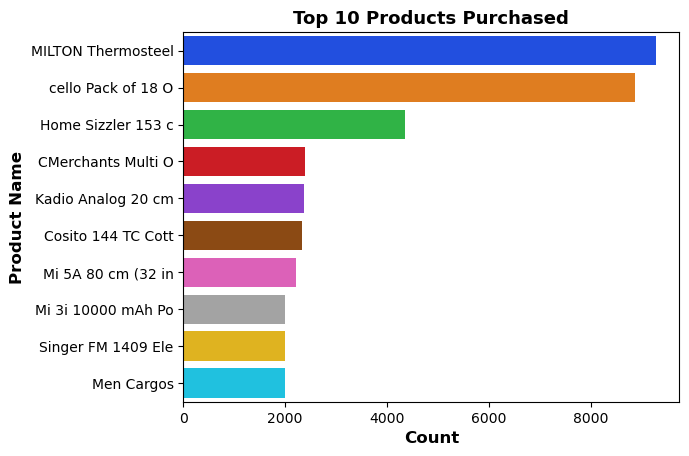

<Figure size 1500x800 with 0 Axes>

In [40]:
top_10_products = df['ProductName'].value_counts().nlargest(10)

# Shorten product names to first 18 characters
top_10_products.index = top_10_products.index.str.slice(stop=18)

# Set the color palette
palette = sns.color_palette('bright', len(top_10_products))

# Plot horizontal bar chart
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette=palette)

# Set axis labels and title
plt.xlabel('Count',fontsize = 12, fontweight = 'bold')
plt.ylabel('Product Name',fontsize = 12, fontweight = 'bold')
plt.title('Top 10 Products Purchased',fontsize = 13, fontweight = 'bold')
plt.figure(figsize=(15,8))

# Adjust plot margins
sns.despine()
plt.tight_layout()

# Show plot
plt.show()

### Top 10 brands which has the highest sale on Flipkart

Now the below lines of code will give us the top brands which are highly purchased on Flipkart. In the first line of code, it extracts the brand name from the ProductName and split it with space and then it will groupby the brands into a different variable called as brand_data and will sum the Price column for each group then we will sort the data into descending order then will take top 10 rows from the brand columns and will see the top 10 brands purchased rest of the code is the visualization part using seaborn and matplotlib library.

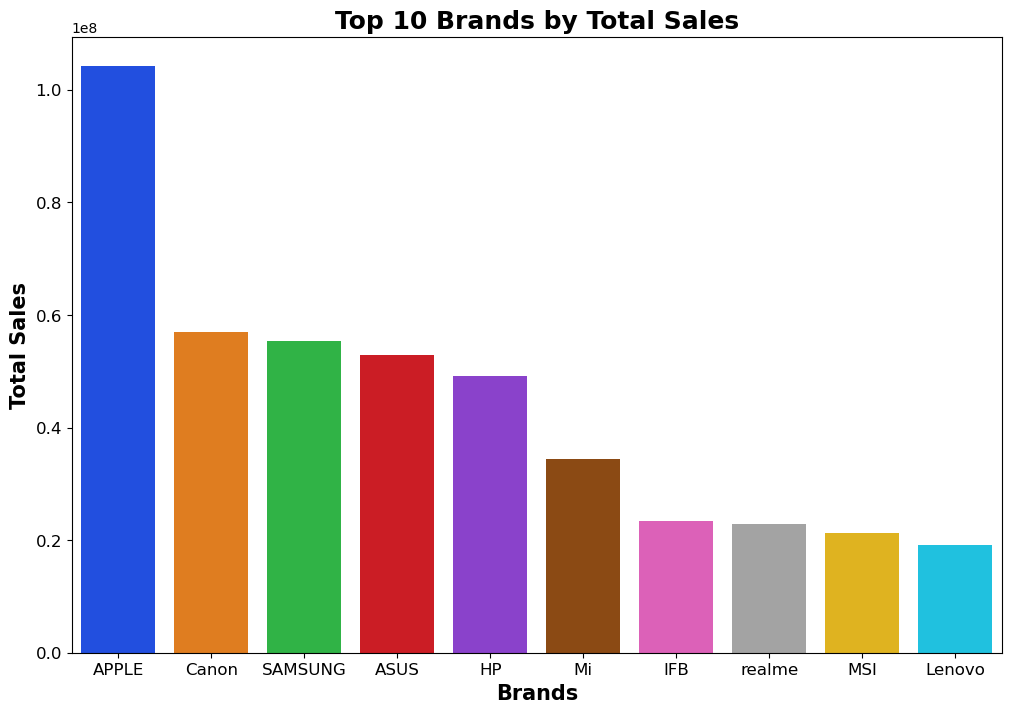

In [41]:
# Extracting the brand name from the ProductName column
df['Brand'] = df['ProductName'].str.split(' ').str[0]

# Group the data by brand name and sum the Price column for each group
brand_data = df.groupby('Brand')['Price'].sum().reset_index()

# Sort the data in descending order by the sum of Price column
brand_data = brand_data.sort_values(by = 'Price', ascending=False)

# Take the top 10 rows to get the top 10 brands being purchased on Flipkart.
top_10_brands = brand_data.head(10)

# Visualize the data using a bar chart
plt.figure(figsize=(12,8))
sns.barplot(x ='Brand', y = 'Price', data=top_10_brands, palette='bright')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Top 10 Brands by Total Sales', fontsize = 18, fontweight = 'bold')
plt.xlabel('Brands',fontsize = 15, fontweight = 'bold')
plt.ylabel('Total Sales', fontsize = 15, fontweight = 'bold')
plt.show()

Now for further analysis we need some necessary libraries for that I have installed some.

In [42]:
!pip install nltk
!pip install vaderSentiment
!pip install wordCloud
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/saadiyashaikh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saadiyashaikh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Below lines of code will give us the scatter graph of Price vs Rate it will help us to understand the relation between the two. If the points on the scatter plot are tightly clustered around a straight line, it indicates a strong positive linear relationship between Price and Rate Higher the prices the relationship between the price and rate are weak/ non-linear.


The below code uses seaborn and matplotlib libraries for the visualization we will set the x-axis and y-axis as Price and Rate respectively, we will the parameter i.e the size of each scatter plot as 50 and will keep the color as bright followed by the matplotlib library we will set the labels and axis and title of the graph and using the .despine() will remove the top and right spines of the plot, and the .tight_layout()' command will make sure that all the text labels fit inside the graph and then will show it.The graph in the output shows that higher prices tend to be associated with better ratings. There is a positive correlation between price and rating, especially the Price range between 0 to 30000/350000.

/var/folders/7k/5h48znpx49bgjnw_r8yv7mf00000gn/T/ipykernel_45237/2379653622.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Price', y='Rate', s=50, palette = "bright")


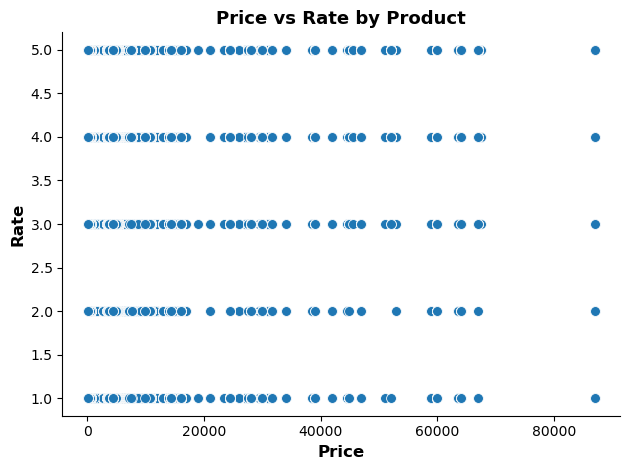

In [43]:
# Create a scatter plot of Price vs Rate
sns.scatterplot(data=df, x='Price', y='Rate', s=50, palette = "bright")

# Set axis labels and title
plt.xlabel('Price', fontsize = 12, fontweight = 'bold')
plt.ylabel('Rate', fontsize = 12, fontweight = 'bold')
plt.title('Price vs Rate by Product', fontsize = 13, fontweight = 'bold')

# Adjust plot margins
sns.despine()
plt.tight_layout()

# Show plot
plt.show()

In the below code it calculates the sentiment scores for the Review and Summary columns. Firstly, it imports the SentimentIntensityAnalyzer from the vaderSentiment library. Then, it initializes the analyzer object. Next it will add two new columns as Review_Sentiment and Summary_Sentiment. Each Review and Summary is analyzed with the polarity_scores() method and its sentiment score is stored in the respective new columns and then it calculates the mean sentiment scores for the both the columns using the mean() method. The sentiment scores range from -1 to +1, for which -1 indicates extremely negative sentiment and +1 indicates extremely positive sentiment. The output shows the mean score for Review and Summary is 0.31 and 0.37 which means the respective scores are on average slightly positive.

In [44]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Adding a new column to the existing dataframe that will store the sentiment scores for each review.
df['Review_Sentiment'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Summary_Sentiment'] = df['Summary'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Mean sentiment scores for the Review and Summary columns
mean_review_sentiment = df['Review_Sentiment'].mean()
mean_summary_sentiment = df['Summary_Sentiment'].mean()

print("Mean Review sentiment: ", mean_review_sentiment)
print("Mean Summary sentiment: ", mean_summary_sentiment)

Mean Review sentiment:  0.31403062948702426
Mean Summary sentiment:  0.37449731950509074


Now in the below code, we will do the sentiment analysis on Review and Summary column.Importing the necessary librabries, next it instantiates the SentimentIntensityAnalyzer object as sia. Followed by a defined function get_sentiment which takes rows from the dataFrame as input, extract the Summary and Review and combine them into string and then it will calculate the polarity scores for sentiment analysis. Then it will iterate each row in the dataFrame using the .iterrows() and will store sentiment scores in the empty list of sentiments. Finally it will create a new dataFrame and in that it will concatenate the sentiment scores.

In [45]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function for sentiment analysis on Review and Summary column.
def get_sentiment(row):
    summary = row['Summary']
    review = row['Review']
    text = summary + ' ' + review
    sentiment = sia.polarity_scores(text)
    return sentiment

# Applying the above get_sentiment function to each row of the dataFrame and store the sentiment scores in a list
sentiments = []
for index, row in df.iterrows():
    sentiment = get_sentiment(row)
    sentiments.append(sentiment)

# Merging the new list to the existing dataFrame.
sentiments_df = pd.DataFrame(sentiments)
df = pd.concat([df, sentiments_df], axis=1)

# Save the merged dataframe with the sentiment analysis results
df.to_csv('flipkart_product.csv', index=False)

In [46]:
df.head()

,ProductName,Price,Rate,Review,Summary,Brand,Review_Sentiment,Summary_Sentiment,neg,neu,pos,compound
0,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Super!,Great cooler.. excellent air flow and for this...,Candes,0.6360,0.9597,0.000,0.378,0.622,0.9733
1,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,5.0,Awesome,Best budget 2 fit cooler. Nice cooling,Candes,0.6249,0.8591,0.000,0.181,0.819,0.9274
2,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,The quality is good but the power of air is de...,Candes,0.3182,0.2382,0.000,0.671,0.329,0.5994
3,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,1.0,Useless product,Very bad product it's a only a fan,Candes,-0.4215,-0.3597,0.475,0.360,0.166,-0.6478
4,Candes 12 L Room/Personal Air Cooler (White Bl...,3999.0,3.0,Fair,Ok ok product,Candes,0.3182,0.5267,0.000,0.130,0.870,0.6908


By using the text data contained in the Summary column, the below code will generates a word cloud visualization. Then the code joins all the non-null text data in the 'Summary' column into a single string variable named 'text'. After that, the code checks if 'text' is empty. A Word Cloud is generated if the input does not contain an empty value using the function 'WordCloud'. Then the 'WordCloud' function takes in parameters such as the width and height of the image, the maximum font size, and the background color. The data is then used to generate a word cloud based on the frequency of words in the text input. Finally, the code will display the most common words in the Summary column.The output shows most of the positve words.

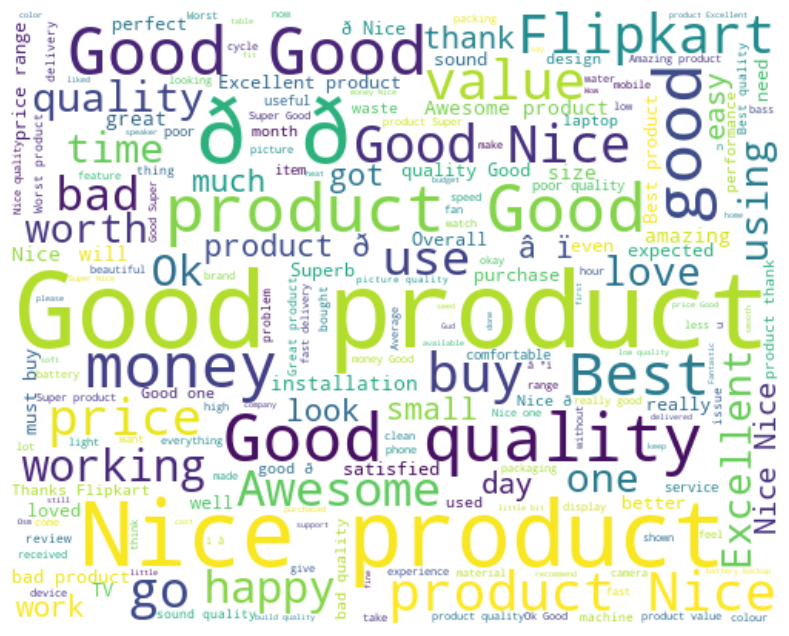

In [47]:
from wordcloud import WordCloud

text = " ".join(review for review in df['Summary'].dropna())

# Checking if the text is empty
if not text:
    print("No data to generate.")
else:
    # Create the wordCloud
    wordcloud = WordCloud(width=500, height = 400, max_font_size = 100, background_color = "white").generate(text)

    # Displaying the wordCloud
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

The below code uses the seaborn and matplotlib library to visualize. Firstly we have to create a new column as 'Overall_Sentiment' that will store the Review_Sentiment and Summary_Sentiment mean. After that we will plot the graph as Overall_Sentiment vs Count which will display the count of reviews falling into each bin of sentiment scores.
The Overall_Sentiment scores range from -1 to 1, in the output the data points are mostly fall in the positive side thats shows that the Produts fall in Overall Sentiment as slightly positive.

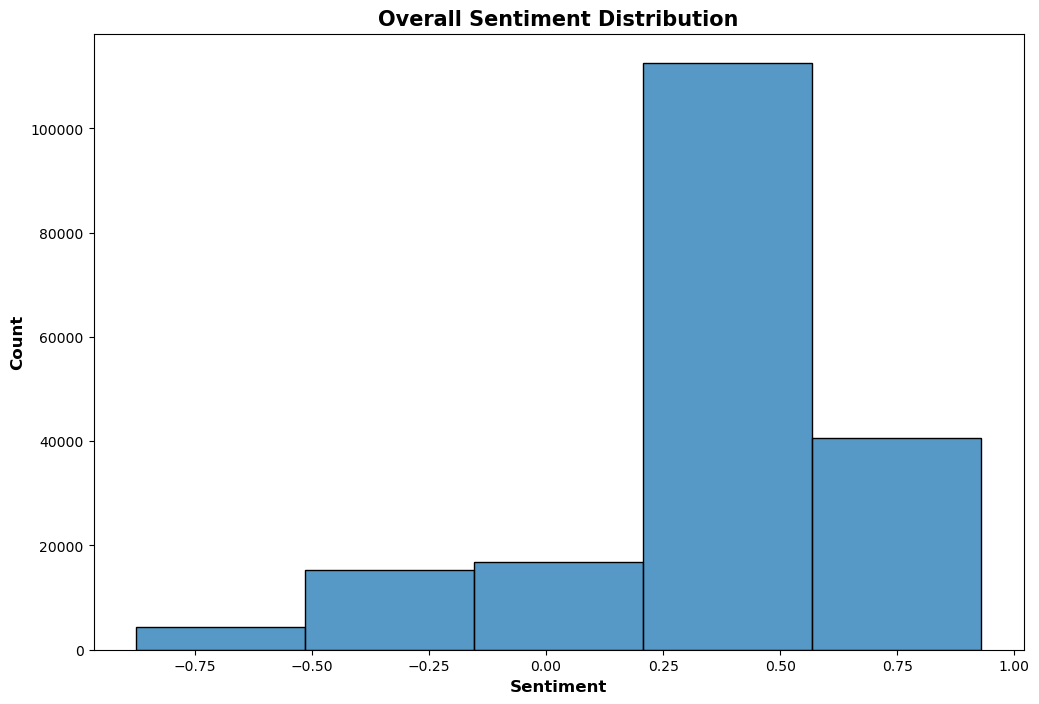

In [48]:
# Create a new column with the combined sentiment scores
df['Overall_Sentiment'] = (df['Review_Sentiment'] + df['Summary_Sentiment']) / 2

# Create a histogram of the overall sentiment scores
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Overall_Sentiment', bins=5)

# Add labels and title
plt.xlabel('Sentiment', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.title('Overall Sentiment Distribution', fontsize = 15, fontweight = 'bold')

# Show the plot
plt.show()

Now for better understanding we will categorize the data of Overall Sentiment Score as Positive, Negative and Neutral for each data points. The code begins by defining a function as categorize_sentiment which takes score as an input followed by an if else funtion which will check if the score is greater than 0.2 it will return as Postive if its less than -0.2, it will return it as Negative else it will return as Neutral.(-0.2 and 0.2 are thresold values). By using the value_count() the code will count the number of reviews in each sentiment then with the help of matplotlib and seaborn library we will plot the bar graph.

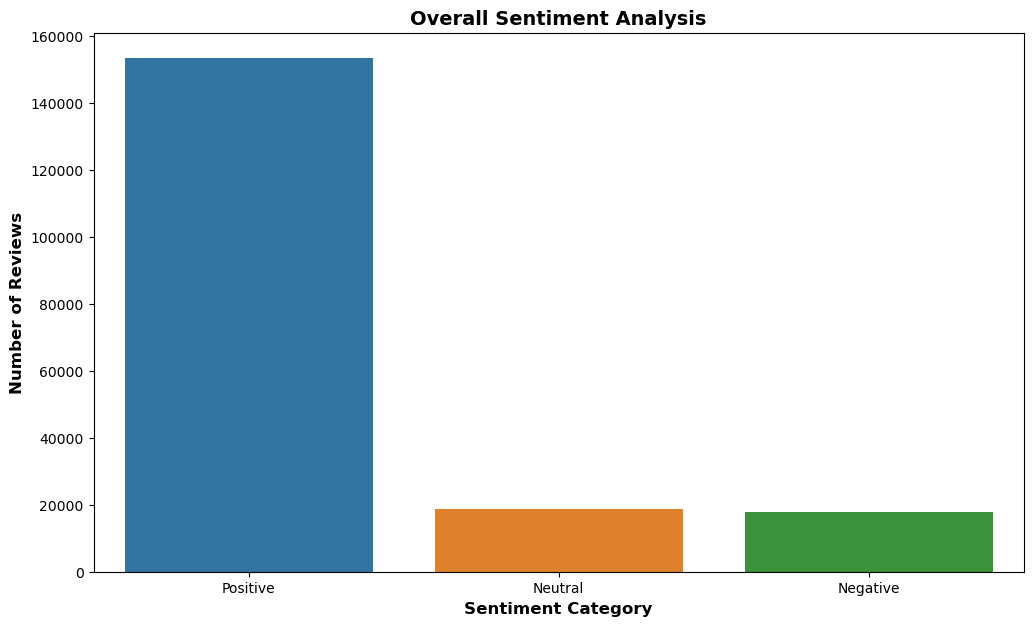

In [49]:
# Categorize the overall sentiment score as positive, negative, or neutral
def categorize_sentiment(score):
    if score > 0.2:
        return 'Positive'
    elif score < -0.2:
        return 'Negative'
    else:
        return 'Neutral'
    
df['Sentiment_Category'] = df['Overall_Sentiment'].apply(categorize_sentiment)

# Count the number of reviews in each sentiment category
sentiment_counts = df['Sentiment_Category'].value_counts()
plt.figure(figsize=(12, 7))
# Create a bar plot
sns.barplot(x=sentiment_counts.index, y=sentiment_counts)
# Add labels and title
plt.xlabel('Sentiment Category', fontsize = 12, fontweight = 'bold')
plt.ylabel('Number of Reviews', fontsize = 12, fontweight = 'bold')
plt.title('Overall Sentiment Analysis',  fontsize = 14, fontweight = 'bold')

# Show the plot
plt.show()

Now for better understanding, we will show the wordCloud for the Negative Reviews only as it will help us more to analyse what the customers feedbacks are and how it can be improve.The below code is checking if there is any null values in the Review and Summary columns.

In [50]:
df.dropna(subset=['Review'], inplace=True)
df.dropna(subset =['Summary'], inplace = True)

The below will give a WordCloud as output for the Negative Reviews firstly we will import the necessary libraries and we will create a string as negative_reviews which will join all the negative reviews by classifying it from the Reviews then it sets the stopwords to be removed from the text before generating the word cloud. After that it will create the wordCloud image.The output shows that most of the feedbacks of the products are about the quality of the product and also about the experience of the product the customers has faced which mostly says that the product is useless, worthless, etc.

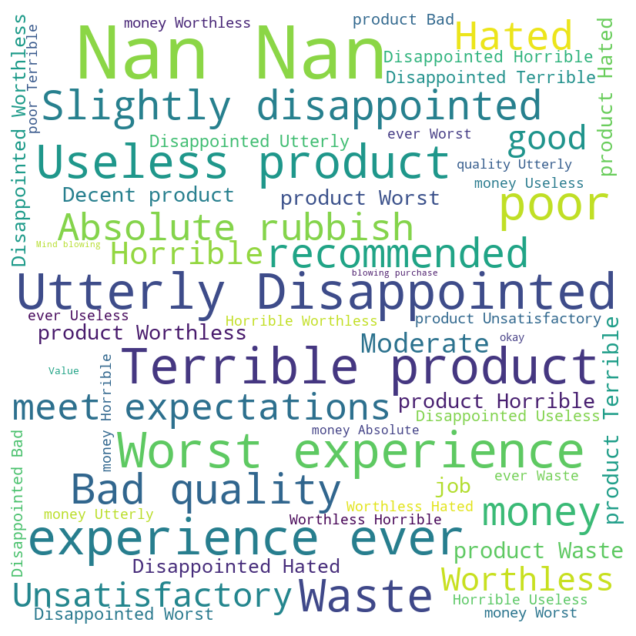

In [51]:
# Import necessary libraries
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Create a string of all the negative reviews
negative_reviews = " ".join(df[df['Sentiment_Category'] == 'Negative']['Review'].tolist())

# Set stopwords
stopwords = set(stopwords.words('english'))

# Generate a wordcloud of negative reviews
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords, min_font_size=10).generate(negative_reviews)

# Display the generated wordcloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Conclusion

With the help of the above analysis the problem as I mentioned for Flipkart was to increase their sales and gain more positive feedbacks from their customers. As per the analysis the problem which have come across was the quality of the products and the experience of the customer with the product which was not good, so in my opinion Flipkart needs to approach different sellers who can provide better quality products and that which will lead to gain more positive feedbacks from the customers and better sales. Overall the Price and Rating of other products are good there are many products on Flipkart's platform which are getting positive feedbacks and higher sales.